# Section 1: Simulating Null Geodesics in 2D

## 1.0: Introduction

In this section, we will be simulating photon trajectories using the Schwarzschild metric on a 2D plane, considering a non-rotating mass as our black hole. We shall introduce the solution of the metric by first considering only the radial and the angular directions and then plotting their trajectories over time. Lastly, we solve the Schwarzschild metric for both parameters, and plot a photon's trajectory radially and orbitally.

The Schwarzschild metric is defined as follows:
\begin{equation}
ds^2 = c^2d\tau^2 =\left(1 - \frac{r_s}{r}\right) c^2 dt^2 - \left(1 - \frac{r_s}{r}\right)^{-1} dr^2 - r^2 (d\theta^2 + \sin^2\theta \, d\phi^2)
\end{equation}

On light-like paths, 
\begin{equation}
c^2d\tau^2=0 
\end{equation}

Furthermore, for the purposes of our simulation, we will consider only photons paths on a 2D plane. Thus, allow  

\begin{equation}
d\phi^2 = 0
\end{equation}

Consequently, our metric simplifies to:
\begin{equation}
\left(1 - \frac{r_s}{r}\right) c^2 dt^2 = \left(1 - \frac{r_s}{r}\right)^{-1} dr^2 + r^2 d\theta^2 
\end{equation}

In [1]:
# importing in dependencies
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
%matplotlib notebook

We establish the following constants and parameters in SI units:

$G = 6.67*10^{-11}$  - the gravitational constant

$M = 6M_\odot = 6*10^{30} $ - the mass of our nonrotating black hole

$c = 2.99792458*10^8 m/s$ - the speed of light

Parameters and initial conditions:

$r_s = \frac{2GM}{c^2}$ - the Schwarzschild radius of the black hole 

$num = 3000$ - number of data points in the simulation

$timestep = t_{end} - t_{begin} = 0.0000015 s$ - time interval between the previous and next frame in the simulation

$r = 3*r_s$ - starting distance of a photon away from the black hole

$\theta = 0$ - starting angle of the photon relative to the black hole

In [2]:
#setting up parameters MAKE SURE YOU DO NOT MODIFY THESE LATER ON IN THE CODE!

#all in SI
G = 6.67*10**(-11) # in SI units
M = 10*10**30 # kg idk, stereotypical mass of three solar masses i guess
c = 299792458 # meters/second

r_s = G*M/c**2 # meters
r = 3*r_s # meters
theta = 0 # radians, to start
num = 3000 #number of data points when plotting
timestep = 0.0000015 # seconds

We define the following helper functions used for simple calculations

In [3]:
def getdr_dt(r):
    """
    Gets the radial velocity of the photon in the Schwarzschild metric
    
        Inputs: 
            r (int or float): current distance of the photon
        Outputs:
            c*(1-r_s/r) (float): returns the radial velocity of the photon in the Schwarzschild metric 
    """
    return c*(1-r_s/r)

def polartocartesian(listtheta, r):
    """
        Converts a list of angles and a given constant radius to cartesian coordinates
    
        Inputs: 
            listtheta (List<int or float>): A list of angles
            r (int or float): current distance of the photon
        Outputs:
            np.array(x): Returns a list of x coordinates, where the ith element refers to the ith angle in listtheta
            np.array(y): Returns a list of y coordiantes, where the ith element refers to the ith angle in listtheta
    """
    x = r*np.cos(listtheta)
    y = r*np.sin(listtheta) 
    return np.array(x), np.array(y)

def to_cartesian(rthetapair):
    """
        Converts a polar coordinate to a cartesian coordinate
    
        Inputs: 
            rthetapair (np.array<float or int>): rthetapair[0] = radius, rthetapair[1] = theta 
        Outputs:
            An np.array<float or int> where the first term is the x coordinate and hte second is the y coordinate
    """
    return np.array([rthetapair[0]*np.cos(rthetapair[1]), rthetapair[0]*np.sin(rthetapair[1])])

def to_polar(xy_pair):
    """
        Converts a  cartesian coordinate to a polar coordinate 
    
        Inputs: 
            xy_pair (np.array<float or int>): xy_pair[0] = x coordinate, xy_pair[1] = y coordinate 
        Outputs:
            An np.array<float or int> where the first term is the radial coordinate and hte second is the angular coordinate
    """
    return np.array([
        np.sqrt(xy_pair[0]**2 + xy_pair[1]**2),
        np.arctan(xy_pair[1]/xy_pair[0])
    ])

def to_cartesian_nparray(rlist, thetalist):
    """
        Converts a polar coordinate to a cartesian coordinates given two input numpy arrays. Assumes rlist.size == thetalist.size
    
        Inputs: 
            rthetapair (np.array<float or int>): rthetapair[0] = radius, rthetapair[1] = theta 
        Outputs:
            An np.array<float or int> where the first term is the x coordinate and hte second is the y coordinate
    """
    return np.array([rlist[i]*np.cos(thetalist[i]) for 
                    i in range(rlist.size)]), np.array([rlist[i]*np.sin(thetalist[i]) for
                                                                     i in range(rlist.size)])


## 1.1: Photon Trajectory in the Radial Direction

The derivation for a photon's trajectory in the radial direction alone with respect to time is as follows:

\begin{equation}
\left(1 - \frac{r_s}{r}\right) c^2 dt^2 = \left(1 - \frac{r_s}{r}\right)^{-1} dr^2 + r^2 d\theta^2 
\end{equation}

Setting $ d\theta^2 = 0$ yields

$$
\therefore \left(1 - \frac{r_s}{r}\right) c^2 dt^2 = \left(1 - \frac{r_s}{r}\right)^{-1} dr^2
$$

$$
  \therefore c dt =  \left(1 - \frac{r_s}{r}\right)^{-1}dr
$$

$$
   \therefore \int_{t_0}^{t_f} c \, dt = \int_{r(t_0)}^{r(t_f)}  \left(1 - \frac{r_s}{r}\right)^{-1} \, dr 
$$

$$
  \therefore c(t_f - t_0) = \int_{r(t_0)}^{r(t_f)}  \left(1 - \frac{r_s}{r}\right)^{-1} \, dr 
$$

$$
  \therefore c(t_f - t_0) = r_s \ln(r(t_f) - r_s) + r(t_f) - (r_s \ln(r(t_f) - r_s) + r(t_f))  
$$
$$\square$$



However, because this relation is too difficult to isolate for $r_f$, we will consider the differential version of the equation at varying timesteps for our simulation. We take:
$$
  c dt =  \left(1 - \frac{r_s}{r}\right)^{-1}dr
$$
$$
 \therefore v_r = \frac{dr}{dt} = c \left(1 - \frac{r_s}{r}\right) 
$$

and consider for each timestep, 
$$
r_{t_f} = r_{t_0} + v_r\Delta t
$$

where
$$
\Delta t = t_f - t_0
$$

This is the relation we will use when simulating the photon's radial trajectory towards a black hole.

Since the photon's trajectory is mathematically undefined past the event horizon, we terminate our simulation  when $ r < r_s$

In [4]:
def populate_r(curr_r = r, numr = num):
    """
    Creates two lists that describe a photon's radial trajectory towards the black hole. 
    Output yvals is default set to 0 because plt.plot() requires both an x and y input array
        Inputs: 
            curr_r (int, float): starting distance of the photon
            numr (int): number of elements to fill rlist with
        Outputs:
            returns two lists; 
            rlist (List<float>): radial position of the photon's trajectory
            yvals (List<int>): equally sized y array filled with 0s
    """
    rlist = [curr_r]
    for t in range(numr):
        v = getdr_dt(curr_r)
        r_new = curr_r - v*timestep
        rlist.append(r_new)
        curr_r = r_new
        prevv = v
    yvals = [0]*len(rlist)
    return np.array(rlist), np.array(yvals)

In [5]:
#calculating r at all timesteps
rlist, yvals = populate_r(r, num)

<IPython.core.display.Javascript object>


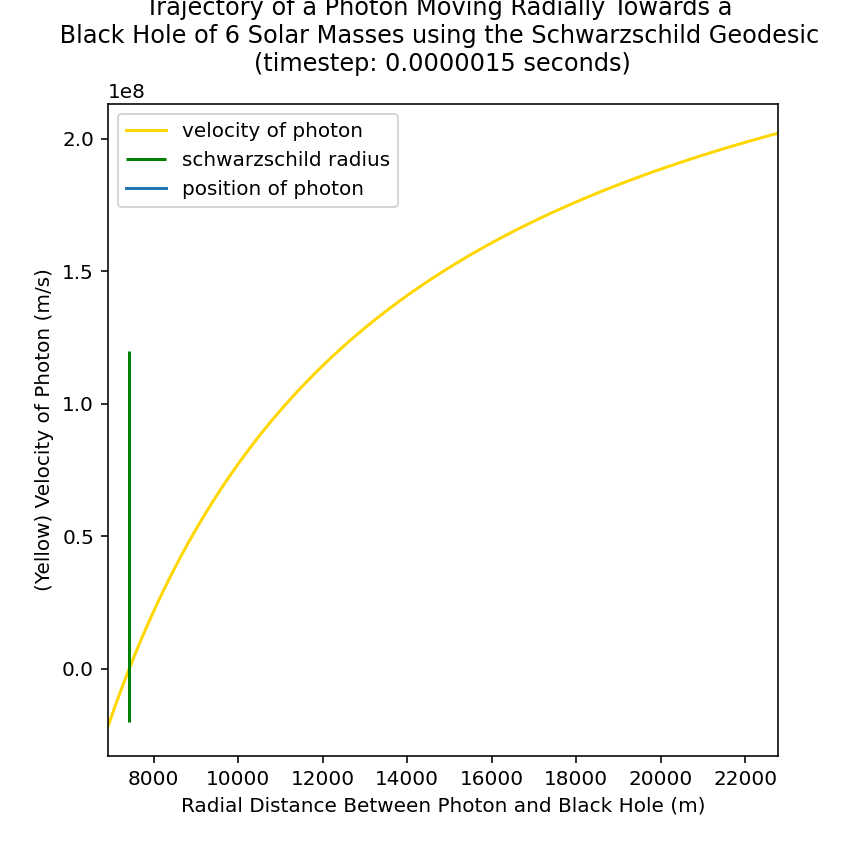

In [6]:
#plotting

fig, ax = plt.subplots()
fig.set_figheight(6)
ax.set_xlim(min(rlist) - 500, max(rlist) + 500)

rvals = np.linspace(min(rlist) - 500, max(rlist) + 500,100)
velocity =  getdr_dt(rvals)

ax.plot(rvals, velocity, label="velocity of photon", color = "gold")

ax.vlines(r_s, -2*10**7, 12*10**7, label = "schwarzschild radius", color="green")
animated_plot1, = ax.plot([],[], label="position of photon")

ax.title.set_text('Trajectory of a Photon Moving Radially Towards a \n Black Hole of 6 Solar Masses using the Schwarzschild Geodesic  \n(timestep: 0.0000015 seconds)')
ax.set_ylabel('(Yellow) Velocity of Photon (m/s)')
ax.set_xlabel("Radial Distance Between Photon and Black Hole (m)")
plt.legend()
plt.show()

#animation
def animate(frame):
    animated_plot1.set_data(rlist[:frame], yvals[:frame])
    return animated_plot1

ani = animation.FuncAnimation(fig = fig, func = animate, repeat=True,
                                    frames= len(rlist), interval=10)

If the simulation plays properly, the blue line should move slower as it gets closer to the green line. We assume that the black hole is centered around (0,0). The blue path represents the trajectory of the photon, the green line represents the Schwarzschild radius, and the yellow line represents the velocity of the photon at varying radial distances. We see that the velocity decreases as the radial distance gets smaller, eventually reaching 0 at the Schwarzschild radius.

One might find it strange that the photon slows down as it approaches the black hole because the speed of light should always be $c$. However, the plot shows the speed of light in the reference frame of an observer far away. In the photon's local frame, its speed will always be $c$. 

This phenomenon is also known as gravitational time dilation, since time starts to slow down as the object approaches the event horizon.

## 1.2: Photon trajectory in the orbital direction

The derivation for a photon's trajectory in the orbital direction alone with respect to time is as follows:

$$
\left(1 - \frac{r_s}{r}\right) c^2 dt^2 = \left(1 - \frac{r_s}{r}\right)^{-1} dr^2 + r^2 d\theta^2 
$$

Setting $ dr^2 = 0$ yields

$$
\therefore \left(1 - \frac{r_s}{r}\right) c^2 dt^2 =  r^2 d\theta^2 
$$

$$
\therefore \sqrt{1 - \frac{r_s}{r}} c dt =  r d\theta
$$

$$
\therefore \sqrt{\frac{1}{r^2} - \frac{r_s}{r^3}} c dt =  d\theta
$$

$$
\therefore \int_{t_0}^{t_f} \sqrt{\frac{1}{r^2} - \frac{r_s}{r^3}} c \, dt = \int_{\theta(t_0)}^{\theta(t_f)}  \, d\theta 
$$

$$
 \therefore  \Delta \theta = \sqrt{\frac{1}{r^2} - \frac{r_s}{r^3}} c \Delta t 
$$

$$
 \therefore  v_\theta =\frac{\Delta \theta}{ \Delta t } = \sqrt{\frac{1}{r^2} - \frac{r_s}{r^3}} c
$$

where

$$
 \Delta t = t_f - t_0
$$
$$
\Delta \theta = \theta_{t_f} - \theta_{t_0}
$$
$$
\square
$$
We will be using the above derivation in our simulation.

In [7]:
def populatetheta(currtheta = theta, numvals = num, r_ = r):
    ''' 
    Creates a list that describe a photon's orbital trajectory around the black hole. 
        Inputs: 
            currtheta (int, float): starting angle of the photon
            numr (int): number of elements to fill returnlist with
        Outputs:
            returnlist (List<float>): angle in radians of the photon's trajectory at each consecutive timestep
        
    '''
    returnlist = [currtheta]
    dtheta_dt = np.sqrt(1-r_s/r_)*c/r_
    for i in range(numvals):
        newtheta = currtheta + dtheta_dt*timestep
        returnlist.append(newtheta)
        currtheta = newtheta
    return np.array(returnlist)

In [8]:
listtheta = populatetheta(theta, num, r)
xpos, ypos = polartocartesian(listtheta, r)

In [9]:
#circle for the schwarzschild radius
x_s, y_s = polartocartesian(np.linspace(0,2*np.pi, 100), r_s)

<IPython.core.display.Javascript object>


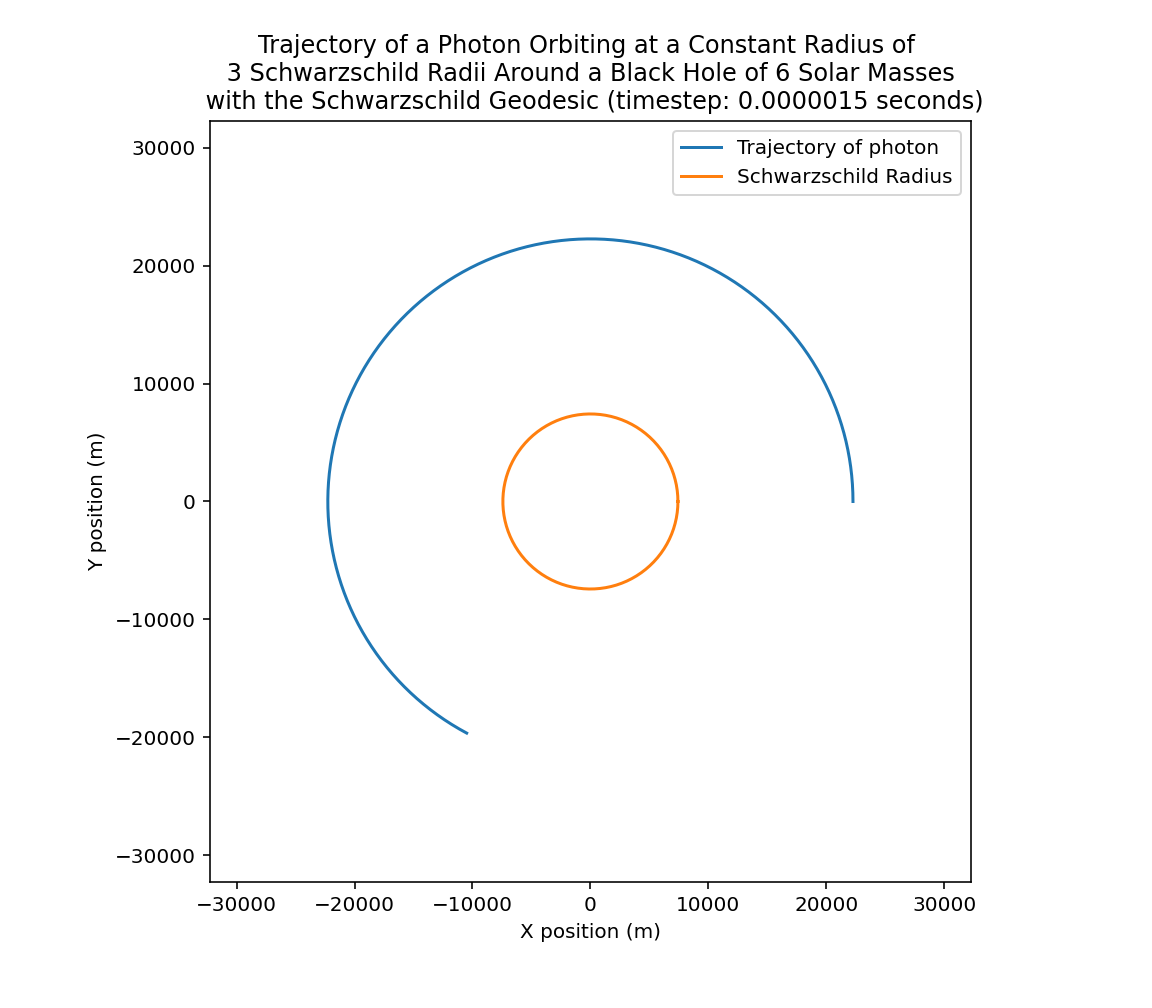

In [11]:
#plotting
fig1, ax1 = plt.subplots()
fig1.set_figheight(7)
fig1.set_figwidth(8)
ax1.set_xlim(min(xpos) - 10000, max(xpos) + 10000)
ax1.set_ylim(min(ypos) - 10000, max(ypos) + 10000)
ax1.set_aspect('equal', adjustable='box')
animated_plot2, = ax1.plot([],[], label="Trajectory of photon")

ax1.title.set_text('Trajectory of a Photon Orbiting at a Constant Radius of \n 3 Schwarzschild Radii Around a Black Hole of 6 Solar Masses \n with the Schwarzschild Geodesic (timestep: 0.0000015 seconds)')
ax1.set_ylabel('Y position (m)')
ax1.set_xlabel("X position (m)")

ax1.plot(x_s, y_s, label="Schwarzschild Radius")

ax1.legend()

#animation
def animate2(frame):
    animated_plot2.set_data(xpos[:frame], ypos[:frame])
    return animated_plot2
ani = animation.FuncAnimation(fig = fig, func = animate2, repeat=True,
                                    frames= len(ypos), interval=50)



Because there isn't a time dependency on $\theta$, the orbit of a photon around a black hole has a constant velocity, and only changes with respect to how far it is from the black hole.

## 1.3: Trajectory of a Photon in Both the Radial and Orbital Direction

We introduce two methods of calculating the trajectory of a photon in both radial and orbital directions; the first by combining the two methods from 1.1 and 1.2, and the second by finding the solution of the orbit equation using a Lagrangian approach.

The solution to the Lagrangian approach is as follows, which is derived within Homework 4 2e:

$$
{\displaystyle \varphi =\int {\frac {dr}{\pm r^{2}{\sqrt {{\frac {1}{b^{2}}}-\left(1-{\frac {r_{\text{s}}}{r}}\right)}}}}}
$$

With bounds, this becomes

$$
{\displaystyle \varphi =\int_{r(\varphi_0)}^{r(\varphi_f)} {\frac {dr}{\pm r^{2}{\sqrt {{\frac {1}{b^{2}}}-\left(1-{\frac {r_{\text{s}}}{r}}\right)}}}}}
$$

In our code, we created a $num$-length list of values for the radius ranging from an initial position up until the Schwarzschild radius, and used the solution above to determine the corresponding final theta, given an initial.

We apply several approximations and simplifications within the code, firstly to populate our dataset stepwise without knowing the solution to the integral, and secondly to avoid floating-point precision error within Python. To avoid floating-point precision errors in SciPy's integrate package, we resorted to using the non-Schwarzschild metric version of the impact parameter. The impact parameter is computed using basic trigonometry, as follows:

From the following diagram, we can write the following equation to calculate $r_m$:

<img src="impactparam.jpeg" alt="A cute cat" title="Cat" width="300" >

$$
r_m =  \lvert \mathbf{r} \rvert \cos{\theta} = \lvert \mathbf{r} \rvert \cos{ \left( \frac{\mathbf{r} \cdot  \mathbf{v_{\perp}}}{\lvert \mathbf{r} \rvert \lvert \mathbf{v_{\perp}} \rvert} \right) }
$$

For the Schwarzschild metric's impact parameter, we adjust r_m to become:
$$
b = r_m \left( 1-\frac{r_s}{r_m}\right)^{-1/2}
$$

However, due to roundoff errors from scipy.integrate that resulted in NaN values, we resorted to leaving out $b$, and instead using $r_m$ as the impact parameter.

To determine the next step's data, we used the Eulerian method. Since the Eulerian method can deviate quickly from the actual solution as the simulation progresses, we attempted to keep the solution as stable as possible by using a large $num$, which allows for a smaller step size in r. However, we can only go so high before our notebook runs out of memory. The Eulerian method is not only reflected within the $r_{\theta_f}$ and $r_{\theta_0}$ bounds needed for integrating the $dr$ term, but also calculating the impact parameter, as we need to use coordinates from the past two steps in order to determine $\mathbf{v_{\perp}}$'s direction. $\mathbf{v_{\perp}}$ is calculated as follows:

$$
\mathbf{v_{\perp}}[0] = -\mathbf{v}[1]
$$
$$
\mathbf{v_{\perp}}[1] = \mathbf{v}[0]
$$

To calculate $r_m$, we only care about the direction of $\mathbf{v}$, and not its magnitude. We must approximate $\mathbf{v}$ from the previous, and the previous-previous steps, since we do not have the angular information of the current step and therefore cannot compute $\mathbf{v}$ without the current and previous steps.

$$
\mathbf{v} = \mathbf{r_{prev}} - \mathbf{r_{prevprev}}
$$

$\mathbf{r_{prev}}$ and $ \mathbf{r_{prevprev}}$ are defined within their polar coordinates, but we convert them to cartesian in order to take their dot product and compute $\theta$ needed for $r_m$.

In [21]:
def populate_rphi(startpos = (100*r_s, 0), v_init = (0, np.pi/num), numvals = num):
    """
    Calculating the trajectory of a photon using the Lagrangian solution of the Schwartzschild metric
        Inputs: 
            startpos (tuple<int or float, int or float>): starting position of the photon in radial coordinates
            v_init(tuple<int or float>): initial velocity direction of the photon in polar coordinates wrt the black hole's position
            numvals (int): number of iterations
        Output: 
            returnlist_r (np.array<float>): radial coordinates of each position of the photon's trajectory
            returnlist_phi (np.array<float>): angular coordinates of each position of the photon's trajectory in radians
    """
  
    first_r = startpos[0]
    second_r = first_r + v_init[0]
    returnlist_r = np.linspace(second_r, r_s, numvals)
    returnlist_r = np.append(np.array([first_r]), returnlist_r)
    
    returnlist_phi = np.zeros(numvals + 1) #initialize a list of 0s
    returnlist_phi[0] = startpos[1]
    returnlist_phi[1] = startpos[1] + v_init[1]
    for r_idx in range(2, len(returnlist_r)):
        #updates
        curr_r = returnlist_r[r_idx]
        old_r = returnlist_r[r_idx - 1]
        old2_r = returnlist_r[r_idx - 2]
        
        old_phi = returnlist_phi[r_idx - 1] #we do not yet know curr_phi because it's what we are trying to calculate
        old2_phi = returnlist_phi[r_idx - 2]
        
        # convert to cartesian coordinates wrt the black hole being the origin
        r_old_vec_xy = to_cartesian(np.array([old_r, old_phi]))
        r_old2_vec_xy =  to_cartesian(np.array([old2_r, old2_phi]))
        v = r_old_vec_xy - r_old2_vec_xy #v in cartesian
        v_perp = -np.array([-v[1], v[0]])
        theta = np.arccos(np.inner(v_perp, r_old_vec_xy)/(np.linalg.norm(v_perp) * np.linalg.norm(r_old_vec_xy)))
 
        
        # calculating r_m
        r_m = curr_r * np.cos(theta) #plus some error term that im just gonna ignore
       
        #calculating b:
#         b = r_m*(1-r_s/r_m)**(-0.5)
        # radial contribution
        dr = integrate.quad(lambda r: ((r/r_m)**2 - (1-r_s/r))**(-0.5) / r, curr_r, old_r)[0]

        curr_phi = old_phi + dr
        if curr_phi < old_phi:
            print("current phi is less than old phi at index", r_idx)
        
            break;
        if np.isnan(curr_phi):
            print("at index", r_idx, "is nan for currphi")
            print("our bounds for r are", curr_r, old_r)
            print("r_m: ", r_m)
            print("r_s:", r_s)
            break;
        returnlist_phi[r_idx] = curr_phi
        
        
    return returnlist_r, returnlist_phi

In [22]:
#create photon trajectories with different initial conditions
num=5000
rlist1 = populate_rphi()
rlist2 = populate_rphi(startpos = (10*r_s, 0))
rlist3 = populate_rphi(startpos = (20*r_s, 0))
rlist4 = populate_rphi(startpos = (30*r_s, 0))
rlist5 = populate_rphi(startpos = (40*r_s, 0))
rlist6 = populate_rphi(startpos = (50*r_s, 0))
rlist7 = populate_rphi(startpos = (60*r_s, 0))
rlist8 = populate_rphi(startpos = (70*r_s, 0))
rlist9 = populate_rphi(startpos = (80*r_s, 0))
rlist10 = populate_rphi(startpos = (90*r_s, 0))

In [23]:
#calculate in xy coordinates for scale?
r1 = rlist1[0][:num]
theta1 = rlist1[1][:num]
r1mod, theta1mod = to_cartesian_nparray(r1, theta1)

r2 = rlist2[0][:num]
theta2 = rlist2[1][:num]
r2mod, theta2mod = to_cartesian_nparray(r2, theta2)

r3 = rlist3[0][:num]
theta3 = rlist3[1][:num]
r3mod, theta3mod = to_cartesian_nparray(r3, theta3)

r4 = rlist4[0][:num]
theta4 = rlist4[1][:num]
r4mod, theta4mod = to_cartesian_nparray(r4, theta4)

r5 = rlist5[0][:num]
theta5 = rlist5[1][:num]
r5mod, theta5mod = to_cartesian_nparray(r5, theta5)

r6 = rlist6[0][:num]
theta6 = rlist6[1][:num]
r6mod, theta6mod = to_cartesian_nparray(r6, theta6)

r7 = rlist7[0][:num]
theta7 = rlist7[1][:num]
r7mod, theta7mod = to_cartesian_nparray(r7, theta7)

r8 = rlist8[0][:num]
theta8 = rlist8[1][:num]
r8mod, theta8mod = to_cartesian_nparray(r8, theta8)

r9 = rlist9[0][:num]
theta9 = rlist9[1][:num]
r9mod, theta9mod = to_cartesian_nparray(r9, theta9)

r10 = rlist10[0][:num]
theta10 = rlist10[1][:num]
r10mod, theta10mod = to_cartesian_nparray(r10, theta10)


<IPython.core.display.Javascript object>


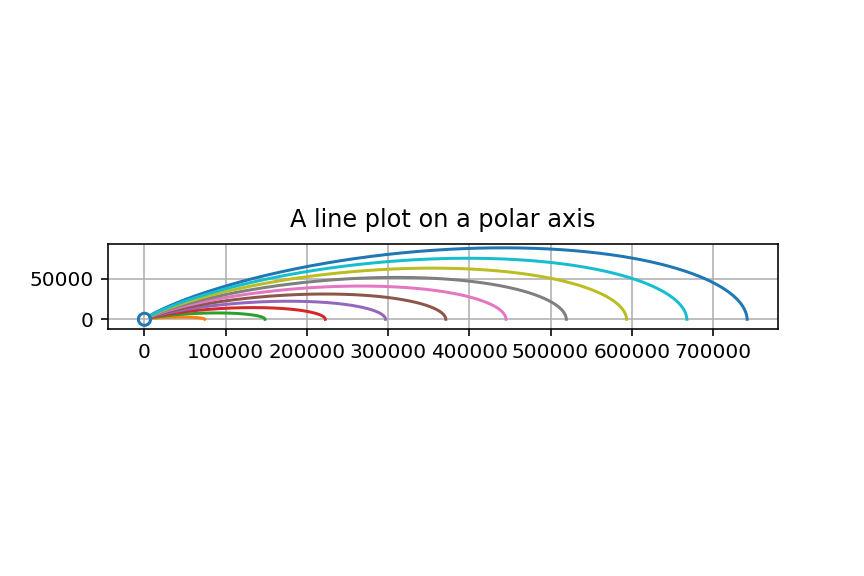

Text(0.5, 1.0, 'A line plot on a polar axis')

In [24]:
fig2, ax2 = plt.subplots()
ax2.plot(r1mod, theta1mod)
ax2.plot(r2mod, theta2mod)
ax2.plot(r3mod, theta3mod)
ax2.plot(r4mod, theta4mod)
ax2.plot(r5mod, theta5mod)
ax2.plot(r6mod, theta6mod)
ax2.plot(r7mod, theta7mod)
ax2.plot(r8mod, theta8mod)
ax2.plot(r9mod, theta9mod)
ax2.plot(r10mod, theta10mod)
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True)

thetaterms = np.linspace(0, 2*np.pi, 100)
eventhor_x, eventhor_y = to_cartesian_nparray(np.array([r_s]*100), thetaterms)

ax2.plot(eventhor_x, eventhor_y)
# ax2.plot(np.linspace(0, 2*np.pi, 100), [r_s/2]*100)
# ax2.plot(np.linspace(0, 2*np.pi, 100), [r_s/4]*100)
# ax2.plot(np.linspace(0, 2*np.pi, 100), [r_s/8]*100)

ax2.set_title("A line plot on a polar axis", va='bottom')


The plot above.
- stability at 1.5r_s doesn't orbit around the black hole even though it's supposed to; blame on approximations

To show that the photon is orbits in a circle at $\frac{3}{2}r_s$ (called the photon sphere), we plot the potential of a photon with respect to its radial distance:

In [ ]:
def V_eff(rlist):
    l = 1
    return l**2 / rlist**2 - l**2 * r_s / rlist**3

r__list = np.linspace(r_s, 15*r_s, 300)
veff =  V_eff(r__list)


fig3, ax3 = plt.subplots()

ax3.title.set_text('Effective Potential of a Black Hole with Photon Orbits')
ax3.set_ylabel('V_eff (scaling by angular momentum l=1)')
ax3.set_xlabel("Radial distance from the black hole (m)")

ax3.plot(r__list, veff, label="V_eff")
ax3.scatter(1.5*r_s, 7.5*10**(-9), color="green", label = "Unstable peak of V_eff")
ax3.legend()

## Conclusion